Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  P

<ipython-input-8-03041534e2bb>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-8-03041534e2bb>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

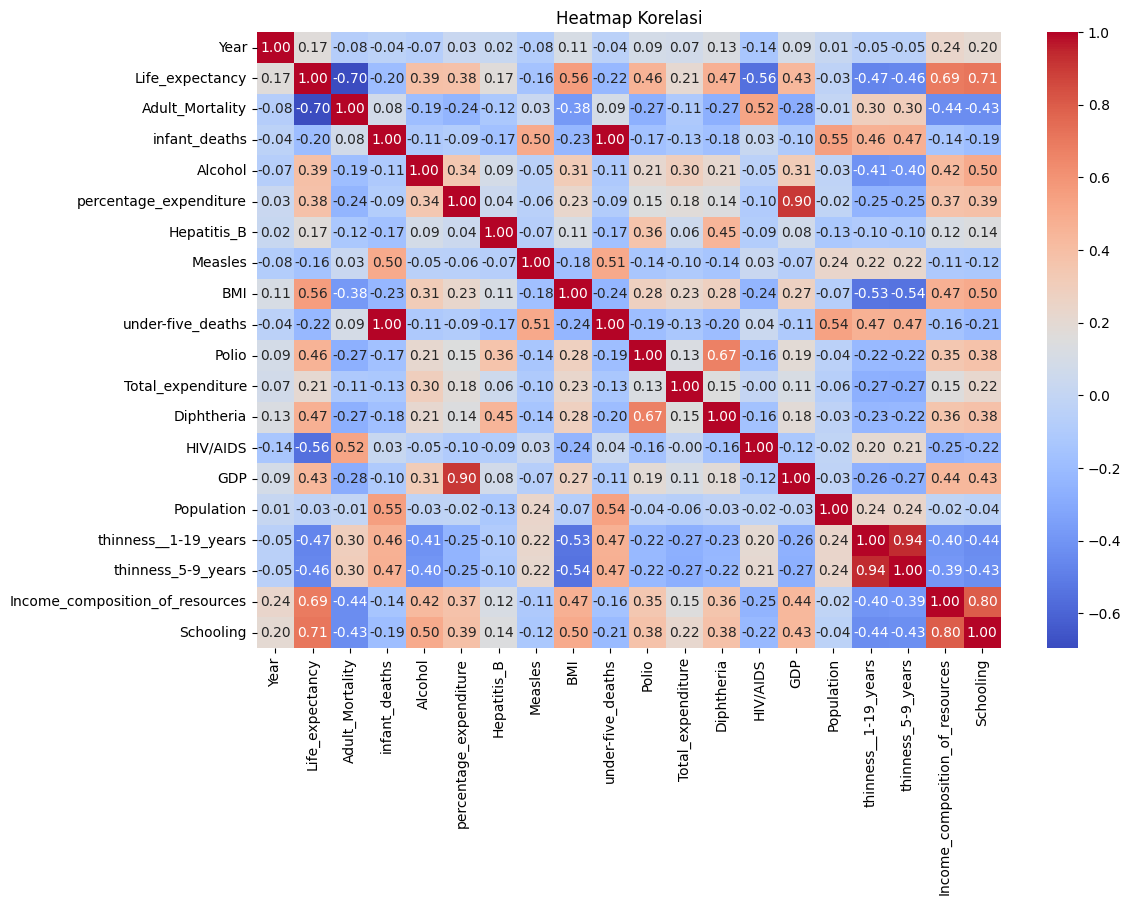

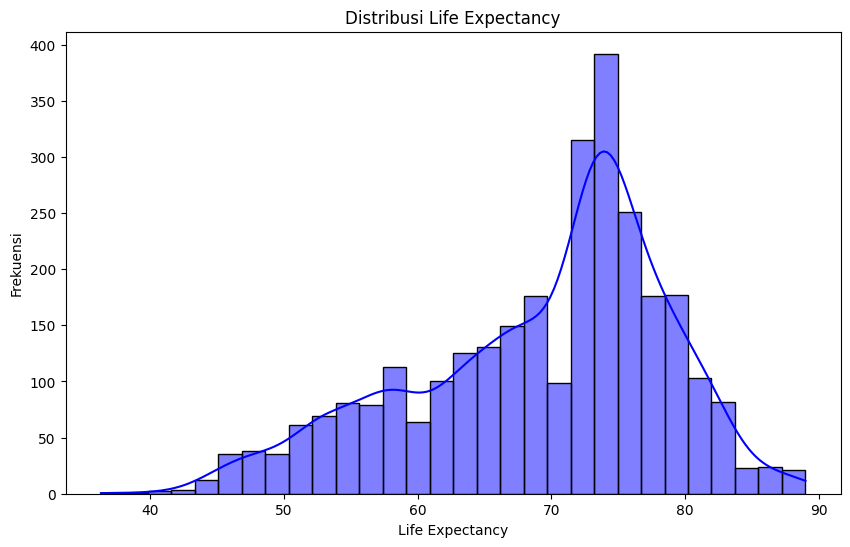


Koefisien Regresi Linier:
                                 Coefficient
Adult_Mortality                    -0.033128
BMI                                 0.072002
Schooling                           0.804332
Income_composition_of_resources     9.990125

Mean Squared Error (MSE): 23.89953183700473
R-squared (R²): 0.7242383940840136

--- Kesimpulan ---
1. Variabel yang memiliki pengaruh terbesar terhadap Life Expectancy:
                                 Coefficient
Income_composition_of_resources     9.990125
Schooling                           0.804332
BMI                                 0.072002
Adult_Mortality                    -0.033128

2. Model memiliki R-squared (R²) sebesar 0.72, menunjukkan bahwa 72.42% varians dalam Life Expectancy dapat dijelaskan oleh model.

Hasil regresi telah disimpan ke file: regression_results.csv


In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ## 1. Import Dataset
# Membaca dataset
file_path = 'Dataset_Gelombang_B.csv'  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

# Melihat informasi awal dataset
print("Informasi Dataset:")
print(data.info())
print("\nData Awal:")
print(data.head())

# ## 2. Pembersihan Data
# Membersihkan nama kolom
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Mengecek duplikasi dan menghapus jika ada
duplicates = data.duplicated().sum()
data = data.drop_duplicates()

# Mengisi nilai hilang
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print(f"\nDuplikasi ditemukan dan dihapus: {duplicates}")
print("\nJumlah data hilang setelah pembersihan:")
print(data.isnull().sum())

# ## 3. Exploratory Data Analysis (EDA)
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

# Heatmap Korelasi
# Selecting only numeric features for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm') # Changed data to numeric_data
plt.title('Heatmap Korelasi')
plt.show()

# Distribusi Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(data['Life_expectancy'], bins=30, kde=True, color='blue')
plt.title('Distribusi Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frekuensi')
plt.show()

# ## 4. Regresi Linier
# Memilih variabel independen dan dependen
X = data[['Adult_Mortality', 'BMI', 'Schooling', 'Income_composition_of_resources']] #variabel bebas
y = data['Life_expectancy'] #variabel terikat

# Memisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nKoefisien Regresi Linier:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

print("\nMean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


# ## 5. Kesimpulan
# Menampilkan hasil dan insight
print("\n--- Kesimpulan ---")
print("1. Variabel yang memiliki pengaruh terbesar terhadap Life Expectancy:")
print(coefficients.sort_values(by='Coefficient', ascending=False))
print(f"\n2. Model memiliki R-squared (R²) sebesar {r2:.2f}, menunjukkan bahwa {r2*100:.2f}% varians dalam Life Expectancy dapat dijelaskan oleh model.")

# Menyimpan hasil regresi ke file CSV
output_path = 'regression_results.csv'
coefficients.to_csv(output_path, index=True)

print(f"\nHasil regresi telah disimpan ke file: {output_path}")

Berdasarkan hasil analisis yang telah dilakukan, berikut adalah beberapa rekomendasi untuk analisis lanjutan:

### 1. **Penyelidikan Hubungan antara Variabel dengan Life Expectancy:**
   - **Income_composition_of_resources (9.99)**: Ini menunjukkan pengaruh yang sangat besar terhadap Life Expectancy. Analisis lanjutan bisa dilakukan untuk mengeksplorasi **mekanisme** di balik hubungan ini. Misalnya, apakah distribusi pendapatan yang lebih merata dalam suatu negara berhubungan langsung dengan perbaikan dalam kualitas hidup? Penambahan data tentang ketimpangan pendapatan atau distribusi kekayaan dapat memperkaya analisis.
   - **Schooling (0.80)**: Pendidikan memiliki pengaruh positif yang signifikan terhadap harapan hidup. Analisis lebih lanjut bisa memeriksa **kualitas pendidikan**, lama masa sekolah, dan akses pendidikan di daerah-daerah tertentu. Pengaruh **pendidikan perempuan** atau **pendidikan tinggi** terhadap kesehatan masyarakat bisa menjadi area eksplorasi yang menarik.
   - **BMI (0.07)**: Indeks Massa Tubuh memiliki pengaruh positif yang kecil terhadap harapan hidup. Penelitian lebih lanjut bisa mencakup **polarisasi BMI di berbagai negara** dan bagaimana prevalensi obesitas atau malnutrisi mempengaruhi Life Expectancy.
   - **Adult_Mortality (-0.03)**: Angka kematian orang dewasa berpengaruh negatif terhadap harapan hidup, yang masuk akal. Analisis lanjutan bisa mengeksplorasi penyebab utama kematian orang dewasa (misalnya, penyakit tidak menular, kecelakaan, atau penyakit menular) dan faktor-faktor yang berkontribusi, seperti **akses ke layanan kesehatan** atau **sistem perawatan kesehatan**.

### 2. **Modeling Lanjutan:**
   - **Eksplorasi Variabel Lain**: Meskipun variabel yang ada saat ini sudah memberikan penjelasan yang signifikan, ada kemungkinan bahwa variabel lain (misalnya, kualitas udara, tingkat akses ke layanan kesehatan, atau pola makan) dapat meningkatkan kemampuan model untuk memprediksi harapan hidup.
   - **Penggunaan Model Non-Linier**: Cobalah model **non-linier** seperti Random Forest, XGBoost, atau Neural Networks untuk melihat apakah ada hubungan non-linier yang belum terdeteksi dalam model linier saat ini.
   - **Model Time-Series (Jika Data Tersedia dalam Waktu)**: Jika data tersedia dalam bentuk **waktu**, model time-series dapat memberikan wawasan lebih lanjut tentang **tren jangka panjang** dalam variabel-variabel ini.

### 3. **Eksplorasi Keterkaitan dengan Faktor Sosial dan Ekonomi:**
   - **Penerapan Analisis Multivariat**: Penambahan **interaksi antar variabel** (misalnya, interaksi antara pendidikan dan pendapatan) bisa memberikan pemahaman yang lebih mendalam tentang faktor-faktor yang memengaruhi harapan hidup di berbagai negara atau wilayah.
   - **Perbedaan Negara atau Wilayah**: Penelitian lanjutan bisa melibatkan analisis lebih mendalam dengan membandingkan negara dengan pendapatan tinggi dan rendah, atau negara dengan tingkat pendidikan tinggi dan rendah, untuk memahami perbedaan yang ada dalam faktor-faktor pengaruhnya terhadap Life Expectancy.
   - **Analisis Sub-Group**: Segmen populasi tertentu (misalnya, berdasarkan usia, jenis kelamin, atau status sosial) dapat dianalisis lebih lanjut untuk melihat apakah pengaruh variabel-variabel tertentu berbeda pada kelompok yang berbeda.

### 4. **Validasi Model:**
   - **Cross-validation**: Meskipun model memiliki R-squared yang tinggi (0.72), langkah validasi yang lebih ketat seperti **k-fold cross-validation** bisa dilakukan untuk memastikan bahwa model tidak overfitting.
   - **Out-of-Sample Testing**: Menggunakan data yang tidak ada dalam pelatihan model untuk melihat apakah model ini dapat diterapkan secara efektif ke dalam prediksi untuk populasi yang lebih luas atau data yang lebih baru.

### 5. **Visualisasi Data**:
   - **Visualisasi Hubungan Variabel**: Membuat visualisasi seperti **scatter plots** atau **heatmap** untuk memvisualisasikan hubungan antara variabel dan Life Expectancy, serta melihat apakah ada pola tertentu yang belum terdeteksi.
   - **Peta Geografis**: Jika data mencakup berbagai negara atau wilayah, visualisasi dalam bentuk **peta geografis** untuk menunjukkan distribusi Life Expectancy dan variabel yang berpengaruh dapat memberikan wawasan yang lebih kaya.

### 6. **Penyelidikan dengan Data Lebih Banyak**:
   - **Kualitas dan Jumlah Data**: Penggunaan dataset yang lebih besar dan lebih bervariasi dapat meningkatkan ketepatan dan ketahanan model. Jika data lebih banyak tersedia (misalnya, data tentang kebijakan kesehatan, teknologi medis, atau infrastruktur), dapat digunakan untuk melatih model lebih lanjut.
   
Dengan pendekatan-pendekatan ini, analisis bisa lebih mendalam dan memberikan wawasan yang lebih dalam tentang faktor-faktor yang memengaruhi Life Expectancy dan insight untuk penelitian dan kebijakan yang akan dilakukan kedepan